In [1]:
import pandas as pd
import numpy as np

In [2]:
thietbi = pd.read_csv('/LTPTDL/thietbi.csv')
nguoidung_thietbi = pd.read_csv('/LTPTDL/nguoidung_thietbi.csv')
nguoidung_sudung = pd.read_csv('/LTPTDL/nguoidung_sudung.csv')

In [3]:
thietbi.rename(columns={'Retail Branding':'Branding','Marketing Name':'MarketingName'},inplace=True)

In [4]:
# Kiểm tra xem hai DataFrame có cột chung nào không
common_columns = set(nguoidung_sudung.columns).intersection(set(nguoidung_thietbi.columns))

if len(common_columns) > 0:
    print("Có các cột chung sau đây:", common_columns)
    # Bây giờ bạn có thể tiến hành nối hai DataFrame bằng cột (hoặc các cột) chung này.
    # Ví dụ: df_merged = pd.merge(nguoidung_sudung, nguoidung_thietbi, on=list(common_columns))
else:
    print("Không có cột chung nào.")


Có các cột chung sau đây: {'use_id'}


In [5]:
dfKetQua = pd.merge(nguoidung_sudung,
nguoidung_thietbi[['use_id', 'platform', 'device']],
on='use_id')

In [6]:
# Kiểm tra xem hai DataFrame có cột chung nào không
common_columns = set(dfKetQua.columns).intersection(set(thietbi.columns))

if len(common_columns) > 0:
    print("Có các cột chung sau đây:", common_columns)
    # Bây giờ bạn có thể tiến hành nối hai DataFrame bằng cột (hoặc các cột) chung này.
    # Ví dụ: df_merged = pd.merge(nguoidung_sudung, nguoidung_thietbi, on=list(common_columns))
else:
    print("Không có cột chung nào.")


Không có cột chung nào.


In [8]:
dfKetQua = pd.merge(dfKetQua,thietbi[[ 'Branding', 'Model']],left_on='device',right_on='Model')

In [9]:
# Hãy liệt kê 5 dòng đầu tiên các mẫu thiết bị (cột device) bắt đầu bằng GT
dfKetQua[dfKetQua.device.str.startswith('GT')].head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Branding,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
1,69.80,14.70,25955.55,22801,android,GT-I9505,Samsung,GT-I9505
2,249.26,253.22,1557.33,22875,android,GT-I9505,Samsung,GT-I9505
3,249.26,253.22,1557.33,22876,android,GT-I9505,Samsung,GT-I9505
4,83.46,114.06,3114.67,22880,android,GT-I9505,Samsung,GT-I9505


In [10]:
dfKetQua.groupby('Branding').agg({
    'outgoing_mins_per_month':'mean',
    'outgoing_sms_per_month':'mean',
    'monthly_mb':'mean',
    'use_id':'count'
})

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
Branding,,,,
HTC,299.842955,93.059318,5144.077955,44
Huawei,81.526667,9.500000,1561.226667,3
LGE,111.530000,12.760000,1557.330000,2
Lava,60.650000,261.900000,12458.670000,2
Lenovo,215.920000,12.930000,1557.330000,2
Motorola,95.127500,65.666250,3946.500000,16
OnePlus,354.855000,48.330000,6575.410000,6
Samsung,191.010093,92.390463,4017.318889,108
Sony,177.315625,40.176250,3212.000625,16


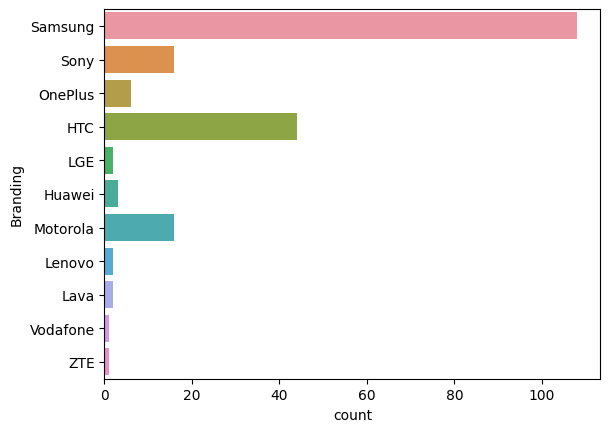

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(y='Branding' ,data=dfKetQua)
plt.show()

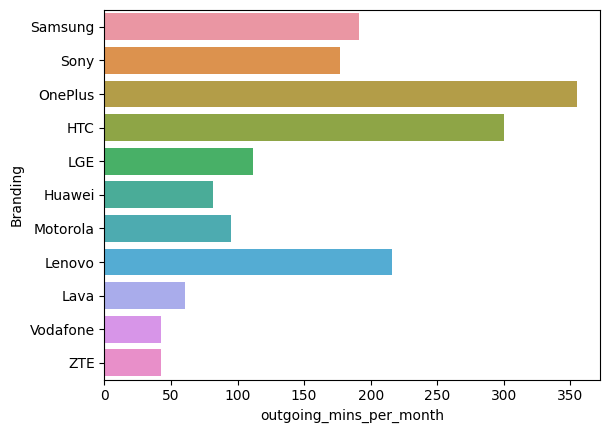

In [9]:
sns.barplot(
    y='Branding',
    x='outgoing_mins_per_month',
    data=dfKetQua,
    estimator=np.mean,
    errorbar=None,
    orient='horizontal'
)
plt.show()

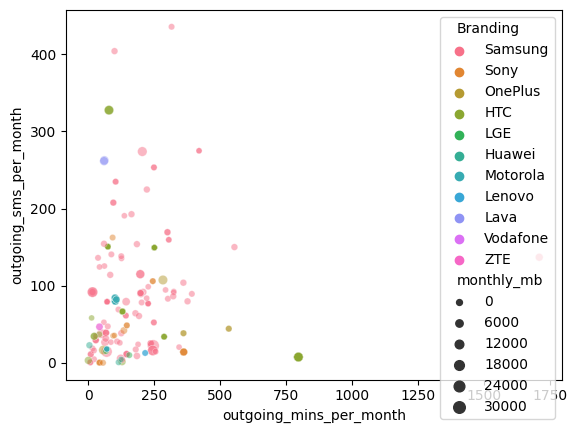

In [10]:
sns.scatterplot(x='outgoing_mins_per_month',
                y='outgoing_sms_per_month',
                size='monthly_mb',
                alpha=0.5,
                hue='Branding',
                data=dfKetQua)

plt.show()
